In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

In [2]:
df= pd.read_csv("C:/Users/prana/Downloads/raw_wheat.csv")
print(df.head(10))

   Sl no. District Name Market Name Commodity Variety Grade  \
0       1      Bhatinda    Bathinda     Wheat   Other   FAQ   
1       2      Bhatinda    Bathinda     Wheat   Other   FAQ   
2       3      Bhatinda    Bathinda     Wheat   Other   FAQ   
3       4      Bhatinda    Bathinda     Wheat   Other   FAQ   
4       5      Bhatinda    Bathinda     Wheat   Other   FAQ   
5       6      Bhatinda    Bathinda     Wheat   Other   FAQ   
6       7      Bhatinda    Bathinda     Wheat   Other   FAQ   
7       8      Bhatinda    Bathinda     Wheat   Other   FAQ   
8       9      Bhatinda    Bathinda     Wheat   Other   FAQ   
9      10      Bhatinda    Bathinda     Wheat   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  Modal_Price Price_Date  
0                     1120                     1125         1120  30-Apr-14  
1                     1120                     1125         1120  29-Apr-14  
2                     1100                     1100         1100  29-Apr

In [3]:
print(df.shape)
print(df.columns)

(1999, 10)
Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal_Price', 'Price_Date'],
      dtype='object')


In [4]:
df=df.rename(index=str, columns={"Sl no.": "Sl_no", 'Market Name':"MarketName","Min Price (Rs./Quintal)": "Min_Price","Price Date":"Price_Date","Modal Price (Rs./Quintal)":"Modal_Price"})



print(df.columns)

df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

print(df.head())

Index(['Sl_no', 'District Name', 'MarketName', 'Commodity', 'Variety', 'Grade',
       'Min_Price', 'Max Price (Rs./Quintal)', 'Modal_Price', 'Price_Date'],
      dtype='object')
   Sl_no District Name MarketName Commodity Variety Grade  Min_Price  \
0      1      Bhatinda   Bathinda     Wheat   Other   FAQ       1120   
1      2      Bhatinda   Bathinda     Wheat   Other   FAQ       1120   
2      3      Bhatinda   Bathinda     Wheat   Other   FAQ       1100   
3      4      Bhatinda   Bathinda     Wheat   Other   FAQ       1100   
4      5      Bhatinda   Bathinda     Wheat   Other   FAQ       1120   

   Max Price (Rs./Quintal)  Modal_Price Price_Date  
0                     1125         1120 2014-04-30  
1                     1125         1120 2014-04-29  
2                     1100         1100 2013-04-29  
3                     1100         1100 2013-04-28  
4                     1120         1120 2014-04-27  


In [5]:
df=df.sort_values(by='Price_Date')
df.drop_duplicates('Price_Date', inplace = True)
df.head(20)

,Sl_no,District Name,MarketName,Commodity,Variety,Grade,Min_Price,Max Price (Rs./Quintal),Modal_Price,Price_Date
558,559,Bhatinda,Maur,Wheat,Other,FAQ,1100,1100,1100,2011-04-19
34,35,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2013-04-06
33,34,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2013-04-07
31,32,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2013-04-08
971,972,Bhatinda,Rampura Phul,Wheat,Other,FAQ,1100,1100,1100,2013-04-09
29,30,Bhatinda,Bathinda,Wheat,Other,FAQ,1100,1100,1100,2013-04-10
1636,1637,Bhatinda,Sangat,Wheat,Other,FAQ,1100,1100,1100,2013-04-11
960,961,Bhatinda,Rampura Phul,Wheat,Other,FAQ,1100,1100,1100,2013-04-12
957,958,Bhatinda,Rampura Phul,Wheat,Other,FAQ,1100,1100,1100,2013-04-13
1339,1340,Bhatinda,Rampuraphul(Mehraj),Wheat,Other,FAQ,1100,1100,1100,2013-04-14


In [6]:
df.to_csv("C:/Users/prana/Downloads/ww.csv", sep=',')

In [7]:
import itertools
import statsmodels.api as sm

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv("C:/Users/prana/Downloads/ww.csv",skipinitialspace=True, usecols=fields)
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [10]:
df=df.set_index('Price_Date')
print(df.head(5))


            Modal_Price
Price_Date             
2011-04-19         1100
2013-04-06         1100
2013-04-07         1100
2013-04-08         1100
2013-04-09         1100


In [11]:
data = df.copy()
y = data
print(y)


            Modal_Price
Price_Date             
2011-04-19         1100
2013-04-06         1100
2013-04-07         1100
2013-04-08         1100
2013-04-09         1100
...                 ...
2020-05-06         1625
2020-05-09         1625
2020-05-10         1625
2020-05-11         1625
2020-05-12         1625

[352 rows x 1 columns]


Price_Date
2011-04-01    1100.0
2011-05-01    1100.0
2011-06-01    1100.0
2011-07-01    1100.0
2011-08-01    1100.0
               ...  
2020-01-01    1625.0
2020-02-01    1625.0
2020-03-01    1625.0
2020-04-01    1625.0
2020-05-01    1625.0
Freq: MS, Name: Modal_Price, Length: 110, dtype: float64


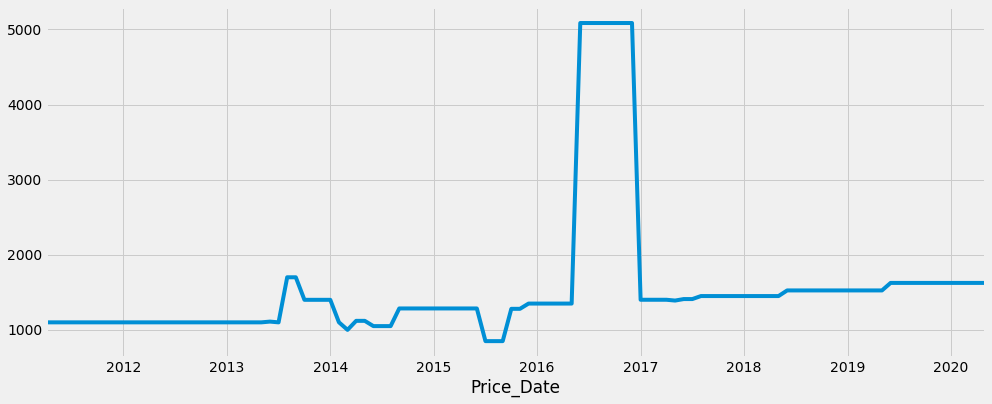

In [12]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())
print(y)

y.plot(figsize=(15, 6))
plt.show()


In [13]:
p = d = q = range(0, 2)  # Define the p, d and q parameters to take any value between 0 and 2

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1948.2368547456845
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1710.1422650799698
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1690.7831590797646
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1450.3619787080122
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1695.438277495077
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1644.2838091588706
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1485.0632262345337
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1452.0130347810123
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1827.8547448096654
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1608.9734365741174
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1602.8358475246978
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1375.1411959713537
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1618.7615663139338
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1563.910601709669
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1424.6382309163562
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1377.0031518713429
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1656.851754124719
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1486.285764562

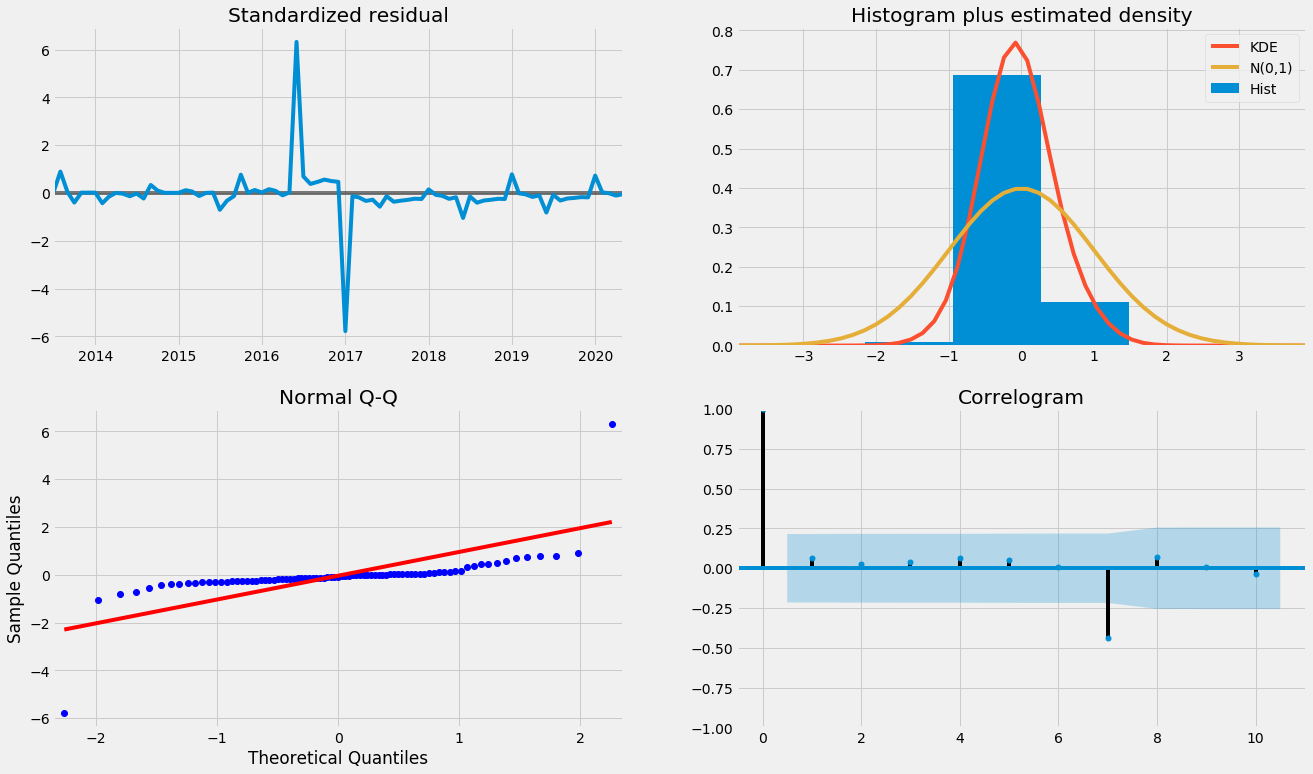

In [15]:
results.plot_diagnostics(figsize=(20, 12))
plt.show()


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Modal_Price   No. Observations:                  110
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -648.725
Date:                            Wed, 11 Aug 2021   AIC                           1307.451
Time:                                    11:57:35   BIC                           1319.545
Sample:                                04-01-2011   HQIC                          1312.309
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8496      0.144      5.881      0.000       0.567       1.133
ma.L1         -1.0001    114.455     -0.009      0.993    -225.328     223.328
ar.S.L12      -0.1067      0.242     -0.442      0.659      -0.580       0.367
ma.S.L12      -1.0003    114.515     -0.009      0.993    -225.446     223.445
sigma2      2.793e+05      0.000   7.98e+08      0.000    2.79e+05    2.79e+05
===================================================================================
Ljung-Box (Q):                       29.93   Jarque-Bera (JB):              3201.34
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                             0.86
Prob(H) (two-sided):                  0.32   Kurtosis:                        33.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.27e+27. Standard errors may be unstable.
"""

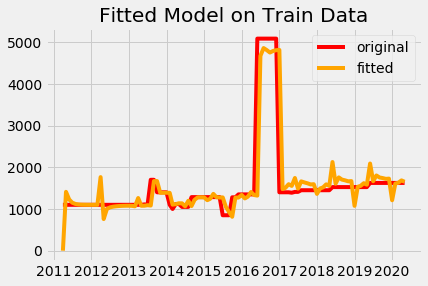

In [17]:
plt.plot(y, color="red", label="original")
plt.plot(results.fittedvalues,color="orange",label="fitted")
plt.legend(loc="best")
plt.title('Fitted Model on Train Data')
plt.show()

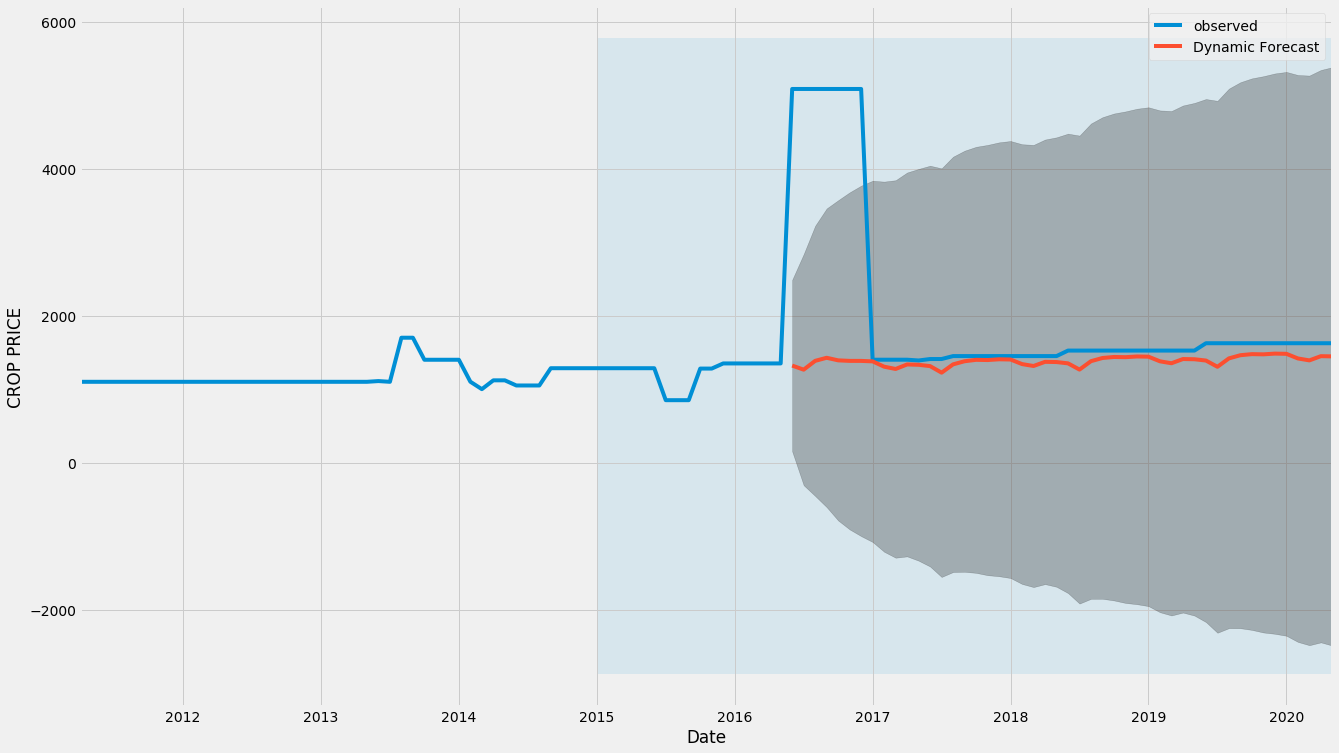

In [18]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['1990':].plot(label='observed', figsize=(20, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')
plt.legend()
plt.show()

In [19]:
# Get forecast 70 steps ahead in future
pred_uc = results.get_forecast(steps=70)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

abs(pred_ci).head(70)

,lower Modal_Price,upper Modal_Price
2020-06-01,1005.201723,3221.482057
2020-07-01,606.829223,3556.896455
2020-08-01,472.646276,3885.387354
2020-09-01,356.274055,4090.952087
2020-10-01,267.849019,4237.533908
...,...,...
2025-11-01,254.462587,5785.865472
2025-12-01,256.456223,5804.267856
2026-01-01,672.421874,5405.872316
2026-02-01,714.035009,5379.578295


In [20]:
modified = pred_ci.reset_index()
modified.rename(columns = {'index':'Date'}, inplace = True)

modified.head(70)

,Date,lower Modal_Price,upper Modal_Price
0,2020-06-01,1005.201723,3221.482057
1,2020-07-01,606.829223,3556.896455
2,2020-08-01,472.646276,3885.387354
3,2020-09-01,356.274055,4090.952087
4,2020-10-01,267.849019,4237.533908
...,...,...,...
65,2025-11-01,-254.462587,5785.865472
66,2025-12-01,-256.456223,5804.267856
67,2026-01-01,-672.421874,5405.872316
68,2026-02-01,-714.035009,5379.578295


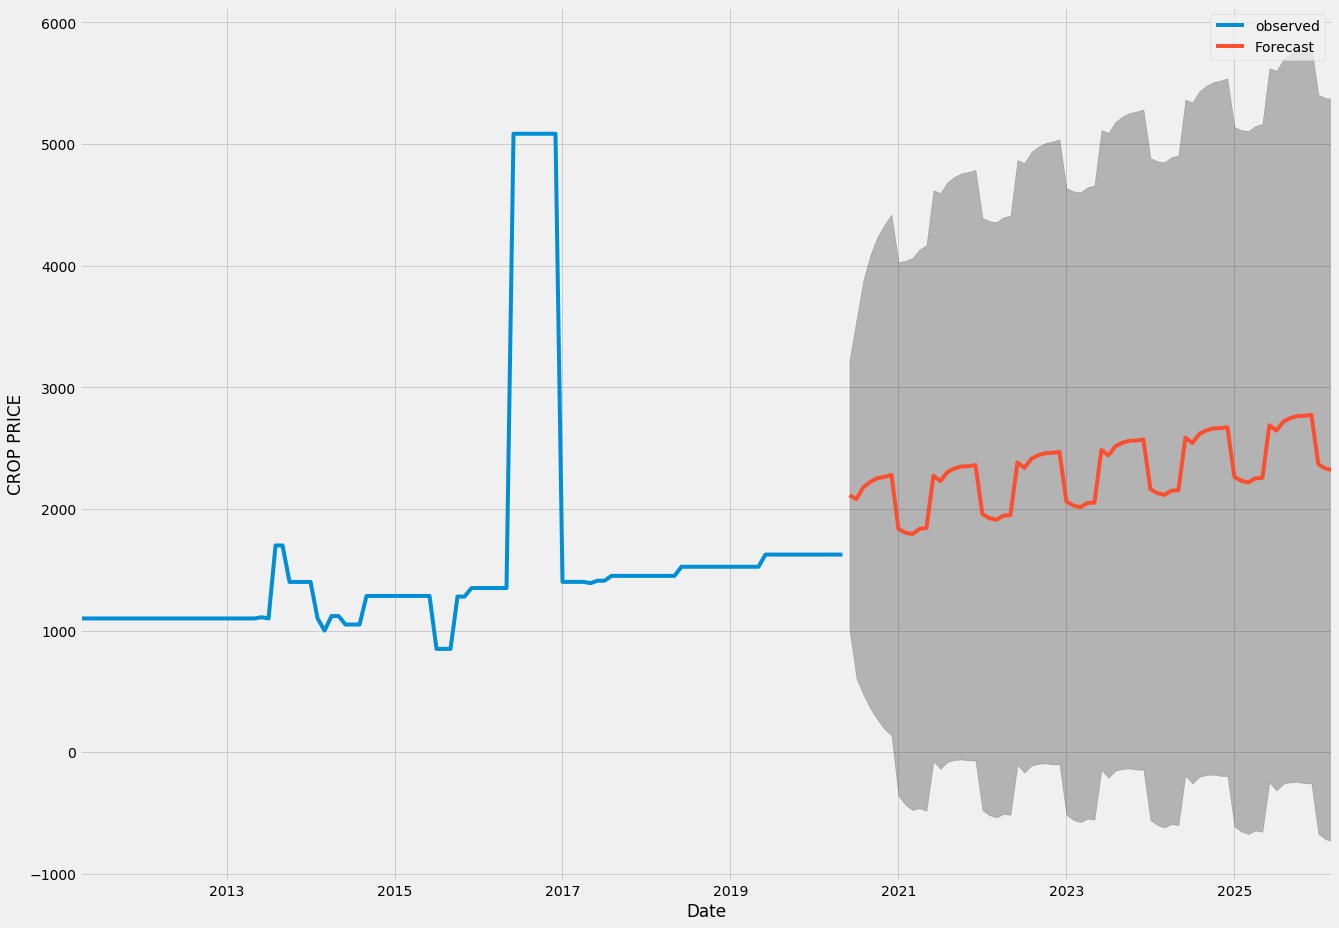

In [21]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [22]:
inp=input("enter date (yyyy-mm-dd)")


enter date (yyyy-mm-dd)2025-05-01


In [23]:
l=modified.loc[modified['Date'] == inp]
print("LOWER MODAL PRICE",abs(l['lower Modal_Price'].values[0]))
print("UPPER MODAL PRICE",abs(l['upper Modal_Price'].values[0]))

LOWER MODAL PRICE 654.3195099853001
UPPER MODAL PRICE 5166.054535983312
